#### Etapa 3 - Análise exploratória dos dados (EDA)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings(action='ignore')

### Importação do Dataframe para EDA com as features

In [2]:
df_athletes_activities = pd.read_csv('C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/scripts_prediction_model/final/st2_df_athletes_activities.csv')
df_athletes_activities

labels=["Active", "Will be Inactive"]

activite_or_not = df_athletes_activities['will_churn'].value_counts().tolist()
values = [activite_or_not[0], activite_or_not[1]]

fig = px.pie(values=df_athletes_activities['will_churn'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"], title="Active vs Will be Inactive")
fig.show()

In [3]:
df_athletes_activities_features = df_athletes_activities.loc[:, ~df_athletes_activities.columns.isin(['activity_date', 'athlete_id', 'will_churn'])]
df_athletes_activities_features

,total_distance (km),total_time (min),pace (min/km),speed (km/h),weekly_act_frequency,weekly_active_time,weekly_act_max_active_time,weekly_dist_traveled,weekly_act_max_dist_traveled,weekly_act_max_pace,weekly_act_max_speed,days_since_last_activity,binary_reincidence,accumulated_reincidence
0,3.61,23.0,6.37,9.42,2,78.0,55.0,11.18,7.57,7.27,9.42,0,0,0
1,5.84,41.0,7.02,8.55,1,41.0,41.0,5.84,5.84,7.02,8.55,8,1,1
2,4.28,32.0,7.48,8.02,2,73.0,41.0,10.12,5.84,7.48,8.55,1,1,1
3,7.52,50.0,6.65,9.02,1,50.0,50.0,7.52,7.52,6.65,9.02,30,1,2
4,7.51,51.0,6.79,8.84,1,51.0,51.0,7.51,7.51,6.79,8.84,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,10.06,45.0,4.47,13.26,3,116.0,45.0,22.86,10.06,5.64,13.26,3,0,0
720,5.20,33.0,6.35,9.27,3,108.0,45.0,20.96,10.06,6.35,13.26,2,0,0
721,12.10,62.0,5.12,11.71,3,140.0,62.0,27.36,12.10,6.35,13.26,3,0,0
722,4.08,22.0,5.39,11.13,2,84.0,62.0,16.18,12.10,5.39,11.71,5,0,0


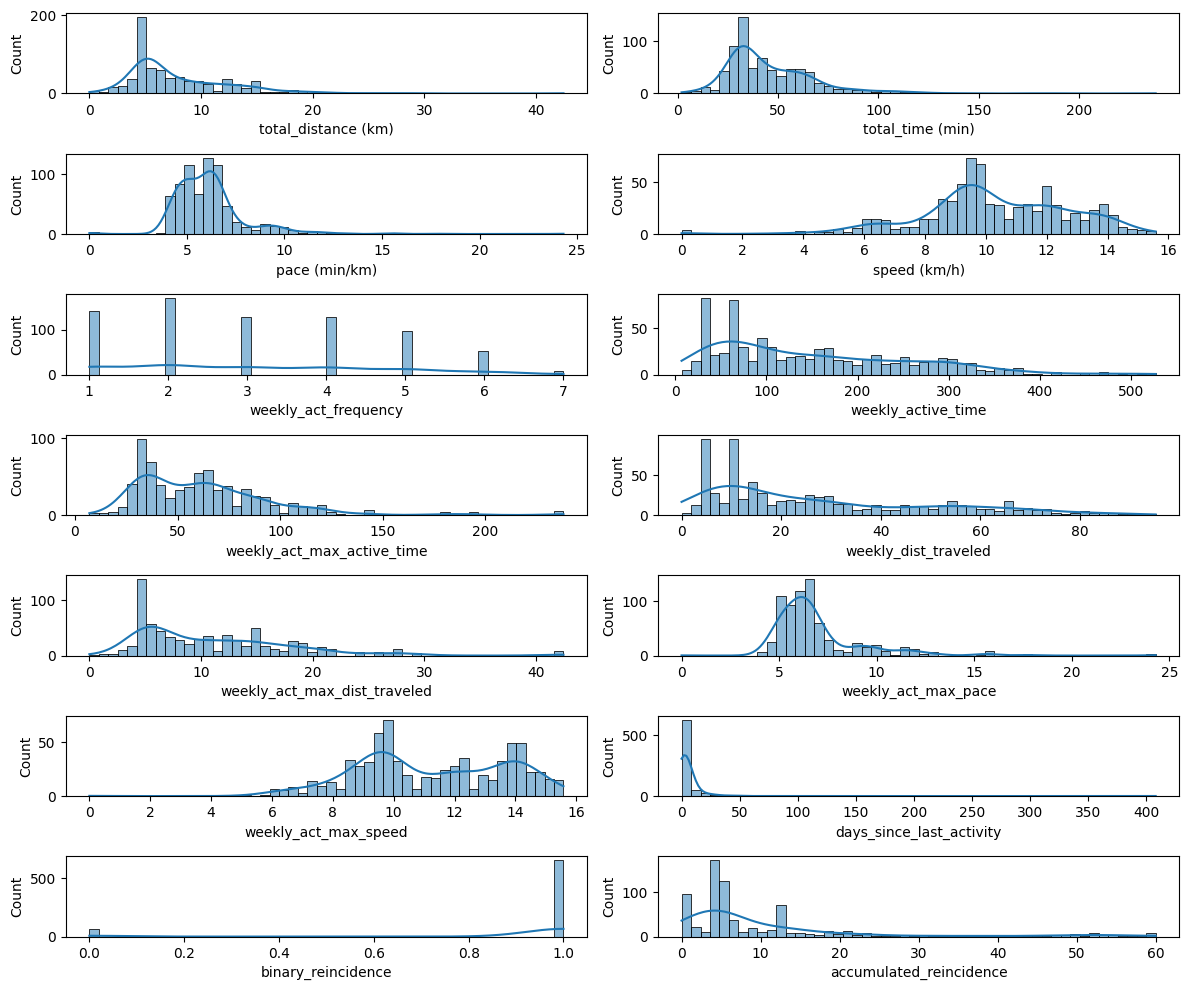

In [4]:
# Definindo o número de colunas e linhas para os subplots
num_cols = 2
num_rows = int(np.ceil(len(df_athletes_activities_features.columns) / num_cols))

# Criando a figura e os subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterando sobre cada feature para criar um histograma
for i, column in enumerate(df_athletes_activities_features.columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.histplot(df_athletes_activities_features[column], bins=50, ax=axes[row, col], kde= True)

# Ajustando o layout
plt.tight_layout()
plt.show()

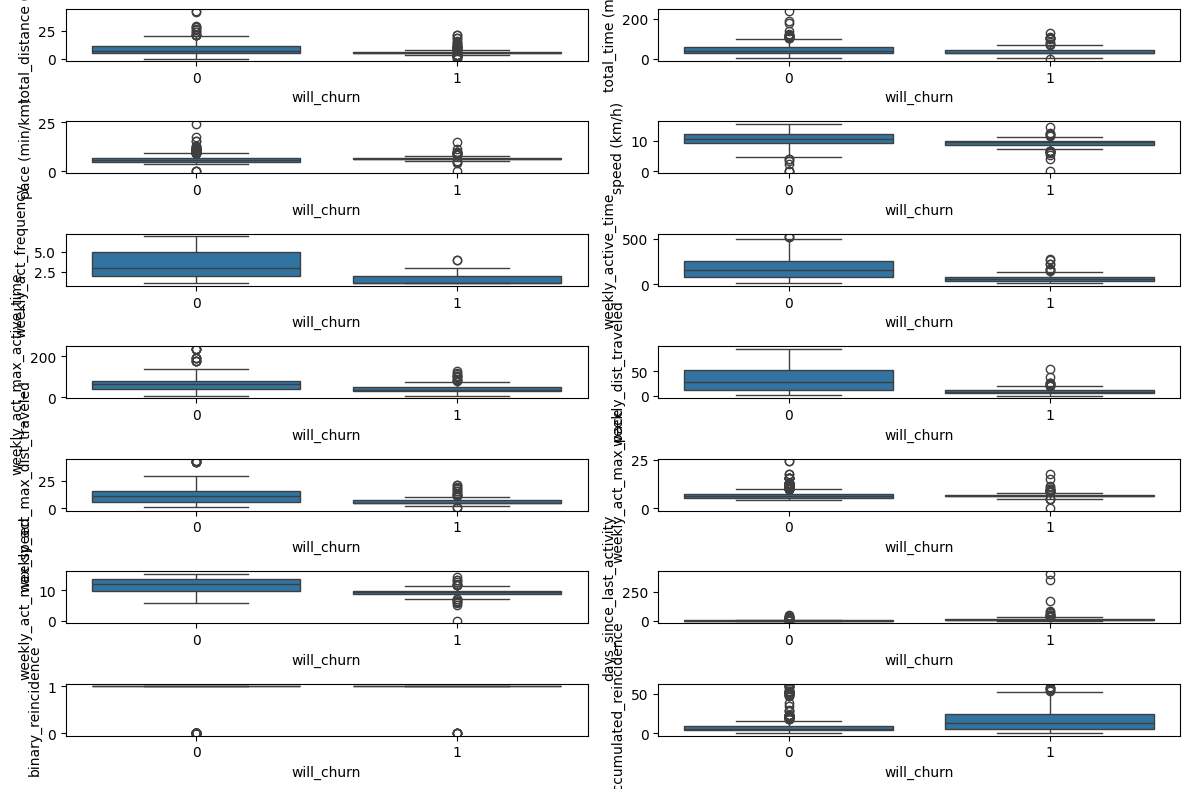

In [5]:
# Definindo o número de colunas e linhas para os subplots
num_cols = 2
num_rows = int(np.ceil(len(df_athletes_activities_features.columns) / num_cols))

# Criando a figura e os subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Iterando sobre cada feature para criar um histograma
for i, column in enumerate(df_athletes_activities_features.columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.boxplot(y = df_athletes_activities_features[column], x = df_athletes_activities['will_churn'], ax=axes[row, col])

# Ajustando o layout
plt.tight_layout()
plt.show()

#### Matriz de correlação

In [6]:
# Análise de correlação das variáveis
corr = df_athletes_activities_features.corr()
corr

,total_distance (km),total_time (min),pace (min/km),speed (km/h),weekly_act_frequency,weekly_active_time,weekly_act_max_active_time,weekly_dist_traveled,weekly_act_max_dist_traveled,weekly_act_max_pace,weekly_act_max_speed,days_since_last_activity,binary_reincidence,accumulated_reincidence
total_distance (km),1.000000,0.875546,-0.323465,0.511025,0.392560,0.557107,0.589146,0.600181,0.656575,-0.138932,0.475724,-0.108243,0.014432,-0.182646
total_time (min),0.875546,1.000000,0.037765,0.096352,0.253446,0.481126,0.599359,0.430286,0.521980,0.123864,0.173246,-0.081518,0.019667,-0.102768
pace (min/km),-0.323465,0.037765,1.000000,-0.750706,-0.234806,-0.147855,-0.054255,-0.309206,-0.265828,0.682306,-0.543070,0.062700,-0.006875,0.123024
speed (km/h),0.511025,0.096352,-0.750706,1.000000,0.435427,0.370109,0.236153,0.533324,0.468821,-0.520927,0.784181,-0.108077,0.027541,-0.215302
weekly_act_frequency,0.392560,0.253446,-0.234806,0.435427,1.000000,0.893514,0.550979,0.885259,0.641076,0.038259,0.718241,-0.259736,0.049893,-0.382398
weekly_active_time,0.557107,0.481126,-0.147855,0.370109,0.893514,1.000000,0.808037,0.960785,0.820579,0.125978,0.643734,-0.219806,0.075021,-0.332064
weekly_act_max_active_time,0.589146,0.599359,-0.054255,0.236153,0.550979,0.808037,1.000000,0.752117,0.894979,0.151466,0.432548,-0.155884,-0.003785,-0.227527
weekly_dist_traveled,0.600181,0.430286,-0.309206,0.533324,0.885259,0.960785,0.752117,1.000000,0.868036,-0.083121,0.772127,-0.205669,0.071110,-0.350654
weekly_act_max_dist_traveled,0.656575,0.521980,-0.265828,0.468821,0.641076,0.820579,0.894979,0.868036,1.000000,-0.100415,0.671475,-0.168930,-0.013146,-0.290871
weekly_act_max_pace,-0.138932,0.123864,0.682306,-0.520927,0.038259,0.125978,0.151466,-0.083121,-0.100415,1.000000,-0.336305,-0.013797,-0.039829,-0.008568


In [7]:
# Create heatmap
heatmap = go.Heatmap(
    z=corr,
    x=df_athletes_activities_features.columns,
    y=df_athletes_activities_features.columns,
    colorscale='Blues',
    zmin=-1,
    zmax=1
)

# Create figure and add trace
fig = go.Figure(heatmap)

# Update layout
fig.update_layout(title='Mapa de calor da matriz de correlações')

# Display the figure
fig.show()

In [8]:
# Transformar a matriz de correlação em um DataFrame (formatado de maneira que seja fácil visualizar pares de features)
df_corr = pd.melt(corr, ignore_index=False, var_name='feature2', value_name='correlation')

# Resetar o índice para que 'feature1' seja uma coluna em vez de índice e renomear a coluna de índice para 'feature1'
df_corr = df_corr.reset_index().rename(columns={'index': 'feature1'})

# Remover linhas onde 'feature1' e 'feature2' são iguais (ou seja, a correlação de uma feature com ela mesma)
df_corr.drop(df_corr[(df_corr['feature1'] == df_corr['feature2'])].index, axis=0, inplace=True)

# Remover duplicatas na coluna de correlação, mantendo apenas a primeira ocorrência
df_corr.drop_duplicates(subset='correlation', inplace=True)

# Resetar o índice mais uma vez após remover duplicatas
df_corr.reset_index(drop=True, inplace=True)

# Selecionando apenas correlações com valor acima de -0.7 ou 0.7 (Forte correlação)
df_strong_corr = df_corr[(np.abs(df_corr['correlation']) > 0.7)]

df_strong_corr

,feature1,feature2,correlation
0,total_time (min),total_distance (km),0.875546
25,speed (km/h),pace (min/km),-0.750706
42,weekly_act_max_speed,speed (km/h),0.784181
46,weekly_active_time,weekly_act_frequency,0.893514
48,weekly_dist_traveled,weekly_act_frequency,0.885259
51,weekly_act_max_speed,weekly_act_frequency,0.718241
55,weekly_act_max_active_time,weekly_active_time,0.808037
56,weekly_dist_traveled,weekly_active_time,0.960785
57,weekly_act_max_dist_traveled,weekly_active_time,0.820579
63,weekly_dist_traveled,weekly_act_max_active_time,0.752117


In [9]:
# Teste de Mann-Whitney U para diferenciação das features em relação ao target
mannwhitneyu_dict = {
    "Feature": [],
    "p-value": []
}


for feature in df_athletes_activities_features.columns:
    sem_lesao = df_athletes_activities.loc[df_athletes_activities['will_churn'] == 0 , feature]
    com_lesao = df_athletes_activities.loc[df_athletes_activities['will_churn'] == 1 , feature]

    U1, p = mannwhitneyu(sem_lesao, com_lesao, method="auto")
    U2, p = mannwhitneyu(com_lesao, sem_lesao, method="auto")

    mannwhitneyu_dict["Feature"].append(feature)
    mannwhitneyu_dict["p-value"].append(round(p, 2))

df_mannwhitneyu = pd.DataFrame(mannwhitneyu_dict).reset_index(drop = True)

df_mannwhitneyu['p-value Significante'] = df_mannwhitneyu['p-value'] < 0.05
df_mannwhitneyu

,Feature,p-value,p-value Significante
0,total_distance (km),0.00,True
1,total_time (min),0.00,True
2,pace (min/km),0.00,True
3,speed (km/h),0.00,True
4,weekly_act_frequency,0.00,True
5,weekly_active_time,0.00,True
6,weekly_act_max_active_time,0.00,True
7,weekly_dist_traveled,0.00,True
8,weekly_act_max_dist_traveled,0.00,True
9,weekly_act_max_pace,0.00,True
